<a href="https://colab.research.google.com/github/mohammadAliMkh/Pytorch/blob/main/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision import models
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [4]:
mnist_train = datasets.FashionMNIST(root = "Data" , train = True ,download = True , transform = ToTensor() , target_transform = None)
mnist_test = datasets.FashionMNIST(root = "Data" , train = False ,download = True , transform = ToTensor() , target_transform = None)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Data/FashionMNIST/raw



In [5]:
len(mnist_train) , len(mnist_test)

(60000, 10000)

In [6]:
class_labels = mnist_train.classes

In [7]:
mnist_train.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

(-0.5, 27.5, 27.5, -0.5)

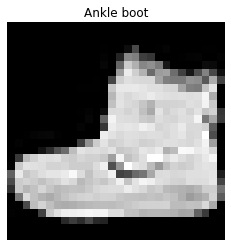

In [8]:
plt.imshow(mnist_train.data[0] , cmap = "gray")
plt.title(class_labels[mnist_train.targets[0]])
plt.axis(False)

In [9]:
def plot_random_images(number_of_images = 16 , data = mnist_train):
  ''' plot random images of selected datasets with their labels
  '''
  plt.figure(figsize = (12 , 8))
  for i in range(1 , number_of_images + 1):
    plt.subplot(4 , 4 , i)
    rand = torch.randint(0, len(mnist_train), size =[1]).item()
    img , label = mnist_train[rand]
    plt.imshow(torch.squeeze(img), cmap = "gray")
    plt.title(class_labels[label])
    plt.axis(False)

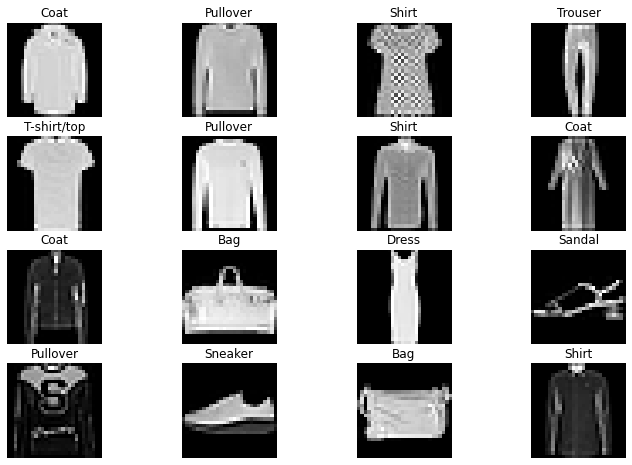

In [10]:
plot_random_images()

In [11]:
train_dataLoader = DataLoader(dataset = mnist_train , batch_size = 32 , shuffle = True)
train_dataLoader

In [12]:
test_dataLoader = DataLoader(dataset = mnist_test , batch_size = 32 , shuffle = False)
test_dataLoader

In [13]:
def plot_first_batch(dataLoader, batch_size = 32):
  img , label = next(iter(dataLoader))
  plt.figure(figsize = (20 ,14))
  for i in range( len(img)):
    plt.subplot(4,8 , i+1)
    plt.imshow(img[i].squeeze() , cmap = "gray")
    plt.title(class_labels[label[i]])
    plt.axis(False)

In [14]:
class FashionMnistModel0(torch.nn.Module):
  def __init__(self , input_layer:int , hidden_layer:int , output_layer:int):
    super().__init__()
    self.layerStacks = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features = input_layer , out_features = hidden_layer),
        torch.nn.Linear(in_features = hidden_layer , out_features = output_layer)
    )
  
  def forward(self , x:torch.Tensor) -> torch.Tensor:
    return self.layerStacks(x)

In [15]:
model0 = FashionMnistModel0(input_layer = 28 * 28 , hidden_layer = 128 , output_layer = len(class_labels))

In [16]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model0.parameters() , lr = 0.001)

In [17]:
from tqdm.auto import tqdm
import timeit

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [40]:
def calclulate_timer(start_time , end_time , device = device):
  ''' this method's been created for calculating process time on the selcted device
  args:
     start_time: timeit.Timer().timer() before operation
     end_time: timeit.Timer().timer() after operation
  output:
     print end_time - start_time 
  '''
  start = start_time
  end = end_time
  time = end - start
  return time

In [20]:
len(train_dataLoader)

1875

In [21]:
#training-part
epochs = 5
start = timeit.Timer().timer()

for step in tqdm(range(epochs)):
  train_loss = 0

  for batch , (data , label) in enumerate(train_dataLoader):
    #train
    model0.train()

    #pass data
    train_preds = model0(data)

    #calculate loss
    loss = loss_fn(train_preds , label)
    train_loss = train_loss + loss

    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #optimizer step
    optimizer.step()
    if (batch + 1) % 400 == 0:
      print(f"number of data passed\t{(batch + 1) * len(data)}")
    
  
  train_loss = train_loss / len(train_dataLoader)

  model0.eval()
  with torch.inference_mode():
    test_loss = 0
    for data , label in test_dataLoader:
      test_preds = model0(data)
      loss = loss_fn(test_preds , label)
      test_loss = test_loss + loss
    test_loss = test_loss / len(test_dataLoader)
  
  print(f"\ntrain loss is {train_loss}\t test loss is {test_loss}\n")
end = timeit.Timer().timer()
calclulate_timer(start_time = start , end_time = end , device = "cuda" if torch.cuda.is_available() else "cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200

train loss is 1.6686121225357056	 test loss is 1.2589360475540161

number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200

train loss is 1.075210690498352	 test loss is 0.9672086238861084

number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200

train loss is 0.8876206874847412	 test loss is 0.8496480584144592

number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200

train loss is 0.7984111309051514	 test loss is 0.7832540273666382

number of data passed	12800
number of data passed	25600
number of data passed	38400
number of data passed	51200

train loss is 0.7421981692314148	 test loss is 0.737657368183136

process time on the cuda is	39.458s


In [22]:
import requests
import os
r = requests.get( "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
     

if os.path.exists("/content/helper_functions.py"):
  print("file already exists")
else:
  f = open("helper_functions.py" , 'wb')
  f.write(r.content)

file already exists


In [54]:
from helper_functions import accuracy_fn

#create evaluation method
def model_evaluation(model:torch.nn.Module, loss_function:torch.nn.Module, dataLoader:torch.utils.data.DataLoader):
  ''' this method will evaluate the model
  arg:
     model: your model which you want to evaluate
     loss_function: your loss function
     dataLoader: your data that in the format of torch.utils.data.DataLoader
  output: return a dicianary contains
     test loss
     test_accuracy
     process time
     device
     '''
     
  start = timeit.Timer().timer()
  device = "cuda" if torch.cuda.is_available() else "cpu"
 
  model.eval()
  with torch.inference_mode():
    
    test_loss = 0
    test_accuracy = 0

    for data , label in dataLoader:
      preds = model(data)

      loss = loss_function(preds , label)
      test_loss = test_loss + loss

      accuracy = accuracy_fn(label , torch.argmax(preds, dim = 1))
      test_accuracy = test_accuracy + accuracy

    
    test_loss = test_loss / len(dataLoader)
    test_accuracy = test_accuracy / len(dataLoader)
  
  end = timeit.Timer().timer()
  evaluation_process_time = calclulate_timer(start_time = start , end_time = end , device = device)
  return {"Test Loss" : f"{test_loss:0.4f}",
          "Test Accuracy":f"{test_accuracy:0.4f}",
          "Evaluation Time":f"{evaluation_process_time:0.2f}s",
          "Evaluated On":device}




In [56]:
model_evaluation(model0 , loss_fn , test_dataLoader)

{'Test Loss': '0.7377',
 'Test Accuracy': '73.8119',
 'Evaluation Time': '0.89s',
 'Evaluated On': 'cuda'}